In [74]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
def load_datasets(filename, column_list, target_column, n_rows):
        
    df = pd.read_csv(filename, delimiter=',', nrows = n_rows)
    X, y = df[column_list], df[target_column]
    
    return X, y

In [3]:
def split_datasets(X, y, test_size):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    return X_train, X_test, y_train, y_test

In [4]:
def plot_data(X_train, X_test, y_train, y_test):
    
    plt.scatter(X_train, y_train, marker='^', c='green')
    plt.scatter(X_test, y_test, marker='o', c='red')
    
    plt.show()

In [5]:
def normalize(X):
    
    mean = np.mean(X, axis=0)    
    std = np.std(X, axis=0)    
    X_new = (X - mean) / std 
    
    return X_new, mean, std

In [6]:
def prepare_X(X):
    
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    
    return X_new

In [7]:
def hypothesis(X, theta):
    
    h_thetha = np.dot(X, theta.T)
    
    return h_thetha

In [8]:
def cost_function(X, y, theta):
    
    m = X.shape[0]
    if m == 0:
        return None
    
    J = (1/(2*m)) * np.sum((hypothesis(X, theta)-y)**2, axis=0)
    
    return J

In [9]:
def derivative(X, y, theta):
    
    m = X.shape[0]    
    d_thetha = (1/(np.shape(X)[0]))* np.dot(X.T, hypothesis(X, theta)-y).T 
    
    return d_thetha

In [10]:
def gradient_descent(X, y, theta, alpha, num_iters, epsilon, print_J = True):
    
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J) 
    for i in range(num_iters):        
        theta = theta - alpha*derivative(X, y, theta)
        J = cost_function(X, y, theta)        
        delta = abs(J_history[-1] - J)
        if print_J == True:
            print(J)
        J_history.append(J)
        if delta < epsilon:
            break
            
    return theta, J_history

In [11]:
def plot_J(X, y):
    
    theta_0 = np.linspace(-20, 20, 100)
    theta_1 = np.linspace(-5, 10, 100)
    
    J_vals = np.zeros((len(theta_0), len(theta_1)))
    for i, t0 in enumerate(theta_0):
        for j, t1 in enumerate(theta_1):
            theta = np.array([t0, t1])
            J_vals[i, j] = cost_function(X, y, theta)
    
    J_vals = J_vals.T
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(theta_0, theta_1, J_vals, color='b')
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Surface plot of the cost function')
    plt.show()
    plt.contour(theta_0, theta_1, J_vals, np.logspace(-2, 3, 20))
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Contour plot of the cost function')
    
    plt.show()

## Основний код програми

Отримання датасетів та видрук їх параметрів.

In [18]:
n_rows = 5000
filename  = 'train.csv'
column_list = ['cont1','cont2','cont3','cont4','cont5','cont6','cont7','cont8','cont9','cont10','cont11','cont12','cont13','cont14']
target_column = ['loss']

df = pd.read_csv(filename, delimiter=',', nrows = n_rows)
X, y = df[column_list], df[target_column]
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

Dataset: X=(5000, 14), y=(5000, 1)


In [19]:
y

loss
0     2213.18
1     1283.60
2     3005.09
3      939.85
4     2763.85
...       ...
4995  6712.74
4996  6788.57
4997  1998.22
4998   551.97
4999  3075.81

[5000 rows x 1 columns]

In [22]:
df.corr()

id     cont1     cont2     cont3     cont4     cont5     cont6  \
id      1.000000 -0.015453  0.008138 -0.023866  0.004194 -0.011321 -0.014005   
cont1  -0.015453  1.000000 -0.080053 -0.441913  0.354308 -0.027312  0.746820   
cont2   0.008138 -0.080053  1.000000  0.457371  0.036860  0.178140  0.020924   
cont3  -0.023866 -0.441913  0.457371  1.000000 -0.337239  0.076587 -0.345717   
cont4   0.004194  0.354308  0.036860 -0.337239  1.000000  0.195568  0.207156   
cont5  -0.011321 -0.027312  0.178140  0.076587  0.195568  1.000000 -0.155757   
cont6  -0.014005  0.746820  0.020924 -0.345717  0.207156 -0.155757  1.000000   
cont7  -0.020974  0.346121  0.043558  0.121824 -0.145064 -0.250316  0.637696   
cont8  -0.003361  0.369126  0.153620 -0.179796  0.523307  0.017797  0.444484   
cont9  -0.015326  0.932660 -0.025528 -0.407468  0.318590 -0.088894  0.787114   
cont10 -0.014867  0.802765  0.068853 -0.328647  0.268746 -0.069794  0.882937   
cont11 -0.026892  0.585148  0.114983  0.035997  0.100919 -0.161560  0.764863   
cont12 -0.026116  0.604260  0.107880  0.017564  0.110751 -0.157535  0.776927   
cont13 -0.009648  0.512297  0.031269 -0.422475  0.180552 -0.080003  0.803101   
cont14 -0.011758  0.080796 -0.033412 -0.021770  0.009525 -0.029542  0.069217   
loss   -0.005380 -0.000273  0.145292  0.135144 -0.056514 -0.020740  0.054843   

           cont7     cont8     cont9    cont10    cont11    cont12    cont13  \
id     -0.020974 -0.003361 -0.015326 -0.014867 -0.026892 -0.026116 -0.009648   
cont1   0.346121  0.369126  0.932660  0.802765  0.585148  0.604260  0.512297   
cont2   0.043558  0.153620 -0.025528  0.068853  0.114983  0.107880  0.031269   
cont3   0.121824 -0.179796 -0.407468 -0.328647  0.035997  0.017564 -0.422475   
cont4  -0.145064  0.523307  0.318590  0.268746  0.100919  0.110751  0.180552   
cont5  -0.250316  0.017797 -0.088894 -0.069794 -0.161560 -0.157535 -0.080003   
cont6   0.637696  0.444484  0.787114  0.882937  0.764863  0.776927  0.803101   
cont7   1.000000  0.124621  0.363181  0.473107  0.745739  0.741065  0.237042   
cont8   0.124621  1.000000  0.461666  0.355179  0.303564  0.318387  0.482195   
cont9   0.363181  0.461666  1.000000  0.782815  0.598580  0.618235  0.621982   
cont10  0.473107  0.355179  0.782815  1.000000  0.690871  0.702630  0.699337   
cont11  0.745739  0.303564  0.598580  0.690871  1.000000  0.994574  0.432009   
cont12  0.741065  0.318387  0.618235  0.702630  0.994574  1.000000  0.445689   
cont13  0.237042  0.482195  0.621982  0.699337  0.432009  0.445689  1.000000   
cont14  0.051983  0.050538  0.099924  0.072020  0.075170  0.079369  0.060861   
loss    0.143051  0.027917  0.021600  0.045172  0.120263  0.122981 -0.003412   

          cont14      loss  
id     -0.011758 -0.005380  
cont1   0.080796 -0.000273  
cont2  -0.033412  0.145292  
cont3  -0.021770  0.135144  
cont4   0.009525 -0.056514  
cont5  -0.029542 -0.020740  
cont6   0.069217  0.054843  
cont7   0.051983  0.143051  
cont8   0.050538  0.027917  
cont9   0.099924  0.021600  
cont10  0.072020  0.045172  
cont11  0.075170  0.120263  
cont12  0.079369  0.122981  
cont13  0.060861 -0.003412  
cont14  1.000000  0.023518  
loss    0.023518  1.000000

<AxesSubplot:>

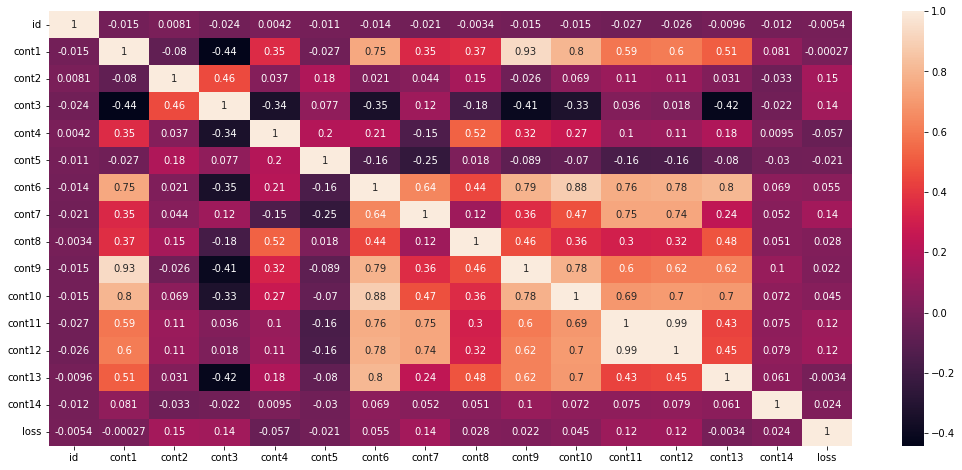

In [27]:
plt.figure(figsize = (18,8))
sns.heatmap(df.corr(method = 'pearson'), annot = True)

In [23]:
correlation_matrix = df.corr()
correlation_matrix['loss'].sort_values(ascending = True)

cont4    -0.056514
cont5    -0.020740
id       -0.005380
cont13   -0.003412
cont1    -0.000273
cont9     0.021600
cont14    0.023518
cont8     0.027917
cont10    0.045172
cont6     0.054843
cont11    0.120263
cont12    0.122981
cont3     0.135144
cont7     0.143051
cont2     0.145292
loss      1.000000
Name: loss, dtype: float64

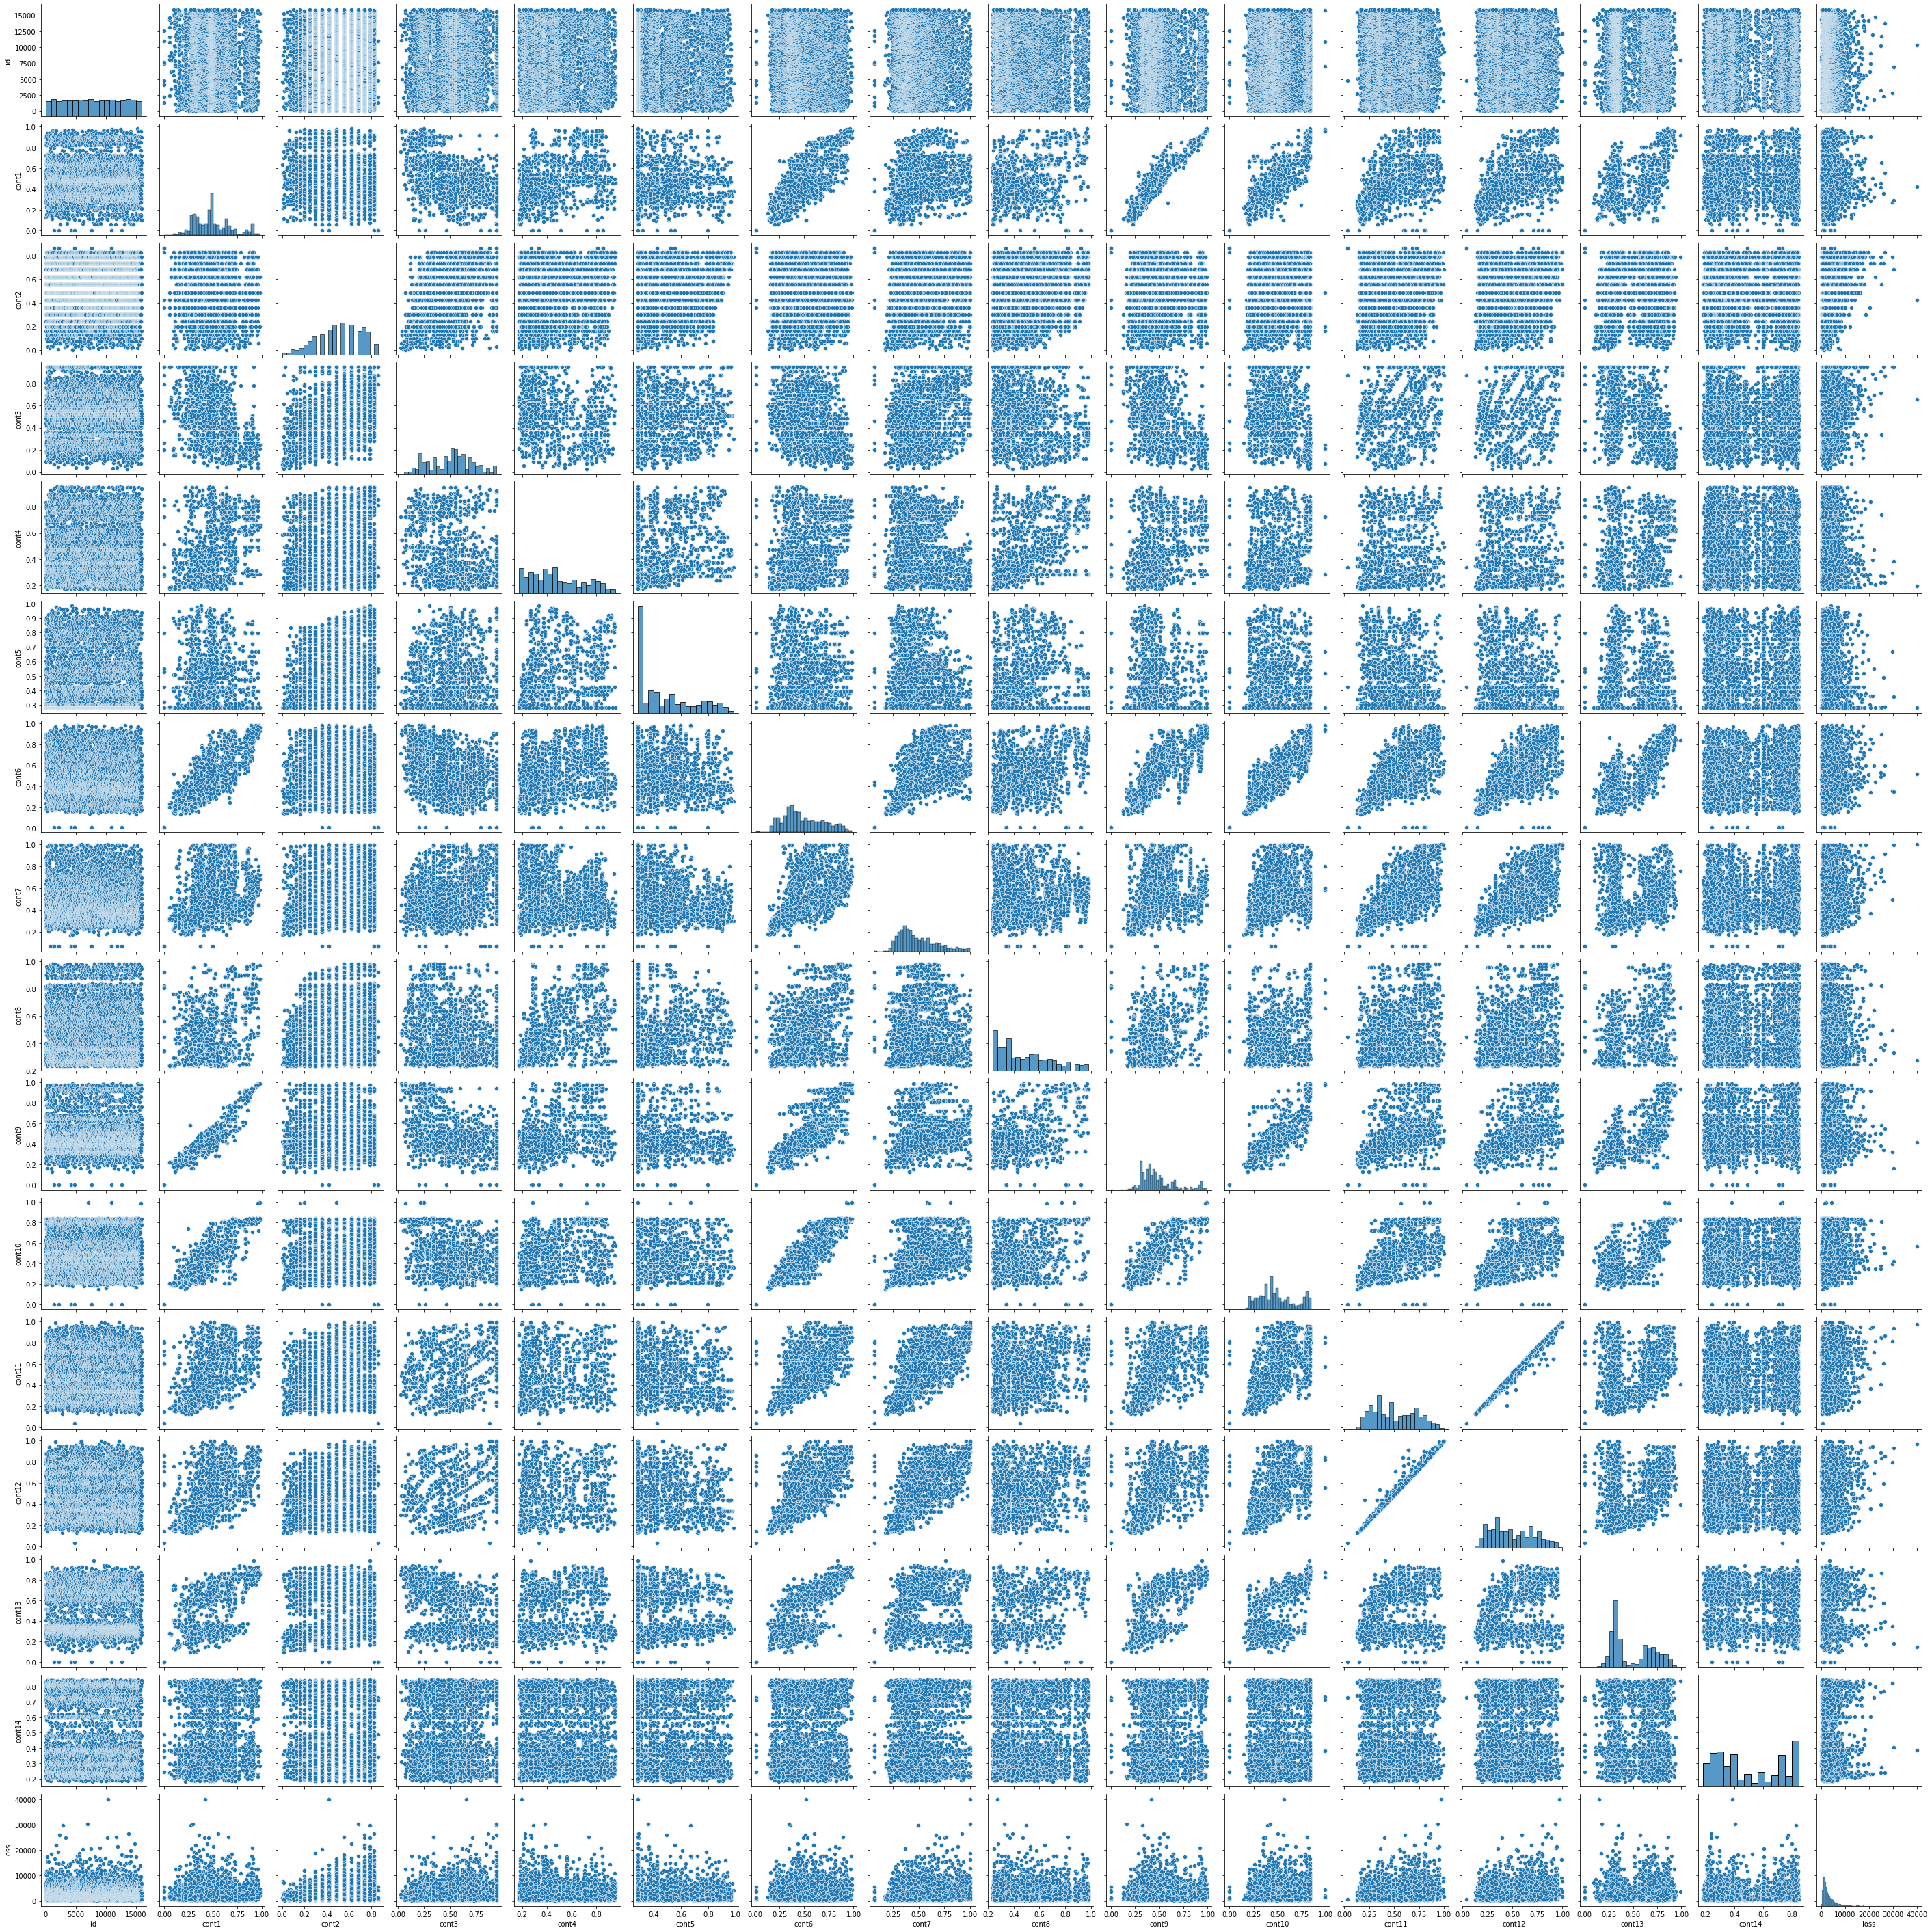

In [30]:
sns.pairplot(df)
plt.show()

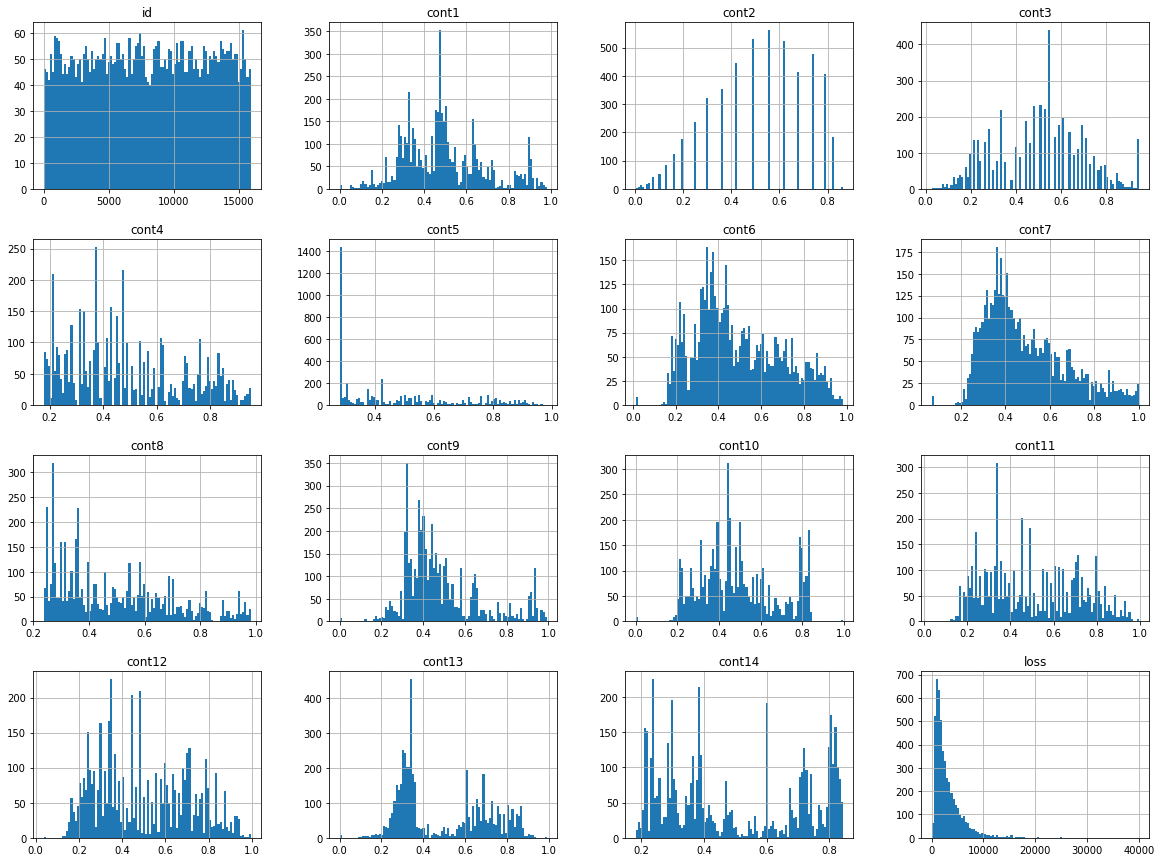

In [35]:
df.hist(bins = 100, figsize = (20,15))
plt.show()

In [36]:
final_columns = ['cont2','cont3','cont7','cont11','cont12']
X, y = df[final_columns], df[target_column]
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

Dataset: X=(5000, 5), y=(5000, 1)


Розбиття датасету на частини:

In [39]:
test_size = 0.05
X_train, X_test, y_train, y_test = split_datasets(X, y, test_size)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(4750, 5), y=(4750, 1)
Test set: X=(250, 5), y=(250, 1)


In [41]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [72]:
test_data_show =  X_test.iloc[:10]
test_values_show = y_test.iloc[:10]

print("\tActual    Predicted")
for actual, predicted in zip(test_values_show.values, regression.predict(test_data_show)):
    print(np.array_str(np.c_[actual, predicted]).replace('[', '   ').replace(']', '   '))

	Actual    Predicted
      3684.2        2924.47724504      
      1462.41       3195.17726608      
       627.8       3706.7627407      
      1215.3        2960.87353831      
      1009.64       2727.36450641      
      2738.81      2555.4007509      
      2585.55       3835.57116416      
      1814.01      3203.9165613      
      1630.04       2855.28861112      
       402.4        3307.51217211      


In [77]:
MAE_sk = metrics.mean_absolute_error(y_test, regression.predict(X_test))
MSE_sk = metrics.mean_squared_error(y_test, regression.predict(X_test))
RMSE_sk = np.sqrt(metrics.mean_squared_error(y_test, regression.predict(X_test)))
print('MAE_sk', MAE_sk)
print('MSE_sk', MSE_sk)
print('RMSE_sk', RMSE_sk)

MAE_sk 2121.081824681247
MSE_sk 10404815.204552334
RMSE_sk 3225.649578697651


Підготовка тренувальних даних (додавання 0-колонки з одиницями). Ініціалізація параметрів регресії (0, 0): 

In [17]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train_norm)
theta = np.array([0, 0])
#print(X)

Для спрощення записів аліас для вектора передбачуваних значень

In [18]:
y = y_train[:]

У випадку використання ВСІХ даних для тренування (test_size=0.0), штрафна функція має повернути величину близьку до 32.072.

In [19]:
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))
print(cost_function(X, y, theta))

X: (92, 2)
y: (92,)
29.648050201176087


Налаштування гіперпараметрів регресії: швидкості навчання та кількості ітерацій.

In [20]:
alpha = 0.01
num_iters = 1500

Запуск градієнтного спуску та видрук знайдених оптимальних значень на екран. У випадку використання всіх даних для тренування, результати будуть близькі до Theta 0: 5.84; Theta 1: 4.59

In [21]:
eps = 0
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, eps, False)
print('Theta 0: {}; Theta 1: {}'.format(new_theta[0], new_theta[1]))

Theta 0: 5.651533179517232; Theta 1: 4.278278397422035


Відображення штрафної функції як функції від thetha0, thetha1.

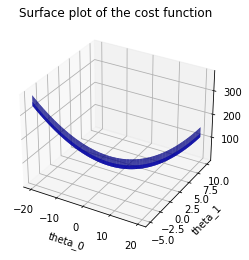

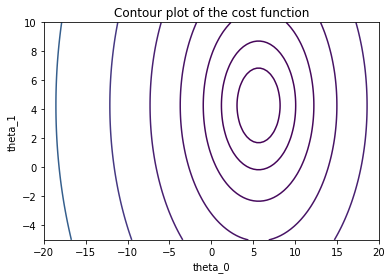

In [22]:
plot_J(X, y)

Відображення знайденої апроксимації разом із тренувальними даними.

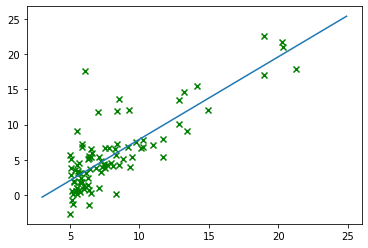

In [23]:
x = np.arange(3, 25, 0.1)
h = new_theta[0] + new_theta[1]*(x-mean)/std
plt.plot(x, h)
plt.scatter(X_train, y_train, marker='x', c='green')

plt.show()

Оцінка похибки апроксимації на тестових даних (test_size має бути більше 0.0 та менше 1.0).

In [34]:
####################
# Нормалізувати тестовий датасет, використовуючи mean, std з тренувального
X_test_proc = (X_test - mean) / std
#print(X_test_proc)
X_test_proc = prepare_X(X_test_proc)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100

X_Test = np.array(X_test).reshape(X_test.shape[0],) # щоб shape=(k,)  а не (k,1), бо не відобразиться у Frame

res = pd.DataFrame({'X' : X_Test, 'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : rel_diff})

print(res)
print("\n")
print(cost_function(X_test_proc, y_test, new_theta))

         X  y_actual     y_pred        err
0  22.2030   24.1470  22.230921   7.935060
1   5.1077    2.0576   2.178656   5.883367
2   5.7107    3.2522   2.885957  11.261400
3   7.6031    4.9981   5.105684   2.152502
4   8.5781   12.0000   6.249329  47.922255


3.690193328344071


In [35]:
regression = LinearRegression() # метод біблоітеки sklearn для перевірки коректності роботи алгоритму
regression.fit(X_train, y_train)

LinearRegression()

In [36]:
y_test_pred_sk = regression.predict(X_test)
rel_diff_sk = np.abs(np.divide(y_test - y_test_pred_sk, y_test)) * 100

X_Test_sk = np.array(X_test).reshape(X_test.shape[0],) # щоб shape=(k,)  а не (k,1), бо не відобразиться у Frame
res_sk = pd.DataFrame({'X' : X_Test_sk, 'y_actual' : y_test, 'y_pred' : y_test_pred_sk, 'err' : rel_diff_sk})

print(res_sk)

         X  y_actual     y_pred        err
0  22.2030   24.1470  22.230927   7.935033
1   5.1077    2.0576   2.178657   5.883397
2   5.7107    3.2522   2.885958  11.261375
3   7.6031    4.9981   5.105686   2.152531
4   8.5781   12.0000   6.249331  47.922240


In [40]:
print ("Comparison between sklearn LinearRegression and custom regression algorithm \n \n")
res_compare = pd.DataFrame({'y_actual' : y_test, 'y_pred_custom' : y_test_pred, 'y_pred_sk' : y_test_pred_sk,'err_custom' : rel_diff, 'err_sk' : rel_diff_sk})
print(res_compare) # для порівняння передбачених значень та похибок, отриманих різними алгоритмами

Comparison between sklearn LinearRegression and custom regression algorithm 
 

   y_actual  y_pred_custom  y_pred_sk  err_custom     err_sk
0   24.1470      22.230921  22.230927    7.935060   7.935033
1    2.0576       2.178656   2.178657    5.883367   5.883397
2    3.2522       2.885957   2.885958   11.261400  11.261375
3    4.9981       5.105684   5.105686    2.152502   2.152531
4   12.0000       6.249329   6.249331   47.922255  47.922240
